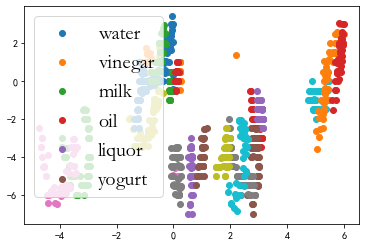

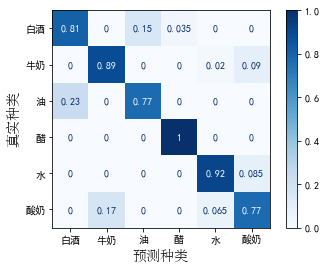

In [11]:
import joblib
import os
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'
classifier = joblib.load('model_all.joblib')

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import matplotlib
Songti = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\STSONG.TTF')

import matplotlib.font_manager as font_manager

matls = ['water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt']
d_p = []
d_r = []
y_test = []
for matl in matls:
    for d in [1, 6, 7, 8]:
        df_f = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
        df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' %(d, matl)))
        diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
        diff_r = df_f['RSSI'] - df_t['RSSI']
        plt.scatter(diff_p, diff_r)
        
        d_p.extend(diff_p)
        d_r.extend(diff_r)
        
        y_test.extend(np.repeat([matl], len(diff_r)))

font = font_manager.FontProperties(family='STSONG',
                           weight='bold',
                           style='normal', size=20)
plt.legend(matls, prop=font, fontsize=20)
X_test = np.column_stack((d_p, d_r))
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 display_labels=['白酒', '牛奶', '油', '醋', '水', '酸奶'],
                                 normalize='true')
plt.xlabel('预测种类', fontproperties=Songti, fontsize=14)
plt.ylabel('真实种类', fontproperties=Songti, fontsize=14)
plt.savefig('result2_mat.pdf', bbox_inches='tight')
y = classifier.predict(X_test)

In [4]:
disp.confusion_matrix

array([[0.81 , 0.   , 0.155, 0.035, 0.   , 0.   ],
       [0.   , 0.89 , 0.   , 0.   , 0.02 , 0.09 ],
       [0.23 , 0.   , 0.77 , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.915, 0.085],
       [0.   , 0.165, 0.   , 0.   , 0.065, 0.77 ]])

In [7]:
data={'confusion_matrix': disp.confusion_matrix, 'label': y_test, 'pred': y}
import scipy.io
scipy.io.savemat('confusion_matrix.mat', data)

In [4]:
acc = np.diagonal(disp.confusion_matrix)

In [5]:
acc.mean()

0.8591666666666665